# lets view simply which lines are measured by which echo train index

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rows, cols = 640, 551
ksp_shape = (640, 551)
pat4 = {        # 0004_
'0': [429, 411, 393, 375, 357, 339, 321, 303, 285, 267, 249, 231, 213, 195, 177, 159, 141, 123, 105, 87, 69, 51, 33, 15, 547],
'1': [431, 413, 395, 377, 359, 341, 323, 305, 287, 269, 251, 233, 215, 197, 179, 161, 143, 125, 107, 89, 71, 53, 35, 17, 549],
'2': [441, 415, 397, 383, 367, 343, 329, 315, 299, 275, 255, 235, 219, 207, 185, 171, 155, 133, 115, 95, 73, 59, 37, 19, 1],
'3': [435, 417, 401, 387, 361, 347, 325, 307, 293, 273, 257, 243, 223, 209, 189, 163, 147, 127, 113, 93, 81, 55, 47, 23, 9],
'4': [437, 423, 407, 381, 371, 351, 333, 313, 291, 281, 261, 237, 227, 205, 183, 173, 145, 131, 111, 99, 75, 57, 39, 21, 3],
'5': [443, 419, 399, 379, 365, 345, 335, 311, 295, 271, 263, 245, 221, 203, 187, 169, 151, 129, 117, 91, 83, 63, 41, 29, 7],
'6': [433, 425, 405, 385, 369, 349, 331, 317, 289, 279, 253, 241, 217, 201, 191, 165, 153, 137, 119, 101, 77, 61, 43, 27, 11],
'7': [439, 421, 403, 389, 363, 353, 327, 309, 297, 277, 259, 239, 225, 199, 181, 167, 149, 135, 109, 97, 79, 65, 45, 25, 5],
'8': [445, 427, 409, 391, 373, 355, 337, 319, 301, 283, 265, 247, 229, 211, 193, 175, 157, 139, 121, 103, 85, 67, 49, 31, 13],
'9': [447, 451, 455, 459, 463, 467, 471, 475, 479, 483, 487, 491, 495, 499, 503, 507, 511, 515, 519, 523, 527, 531, 535, 539, 543],
'10': [449, 453, 457, 461, 465, 469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509, 513, 517, 521, 525, 529, 533, 537, 541, 545]
}

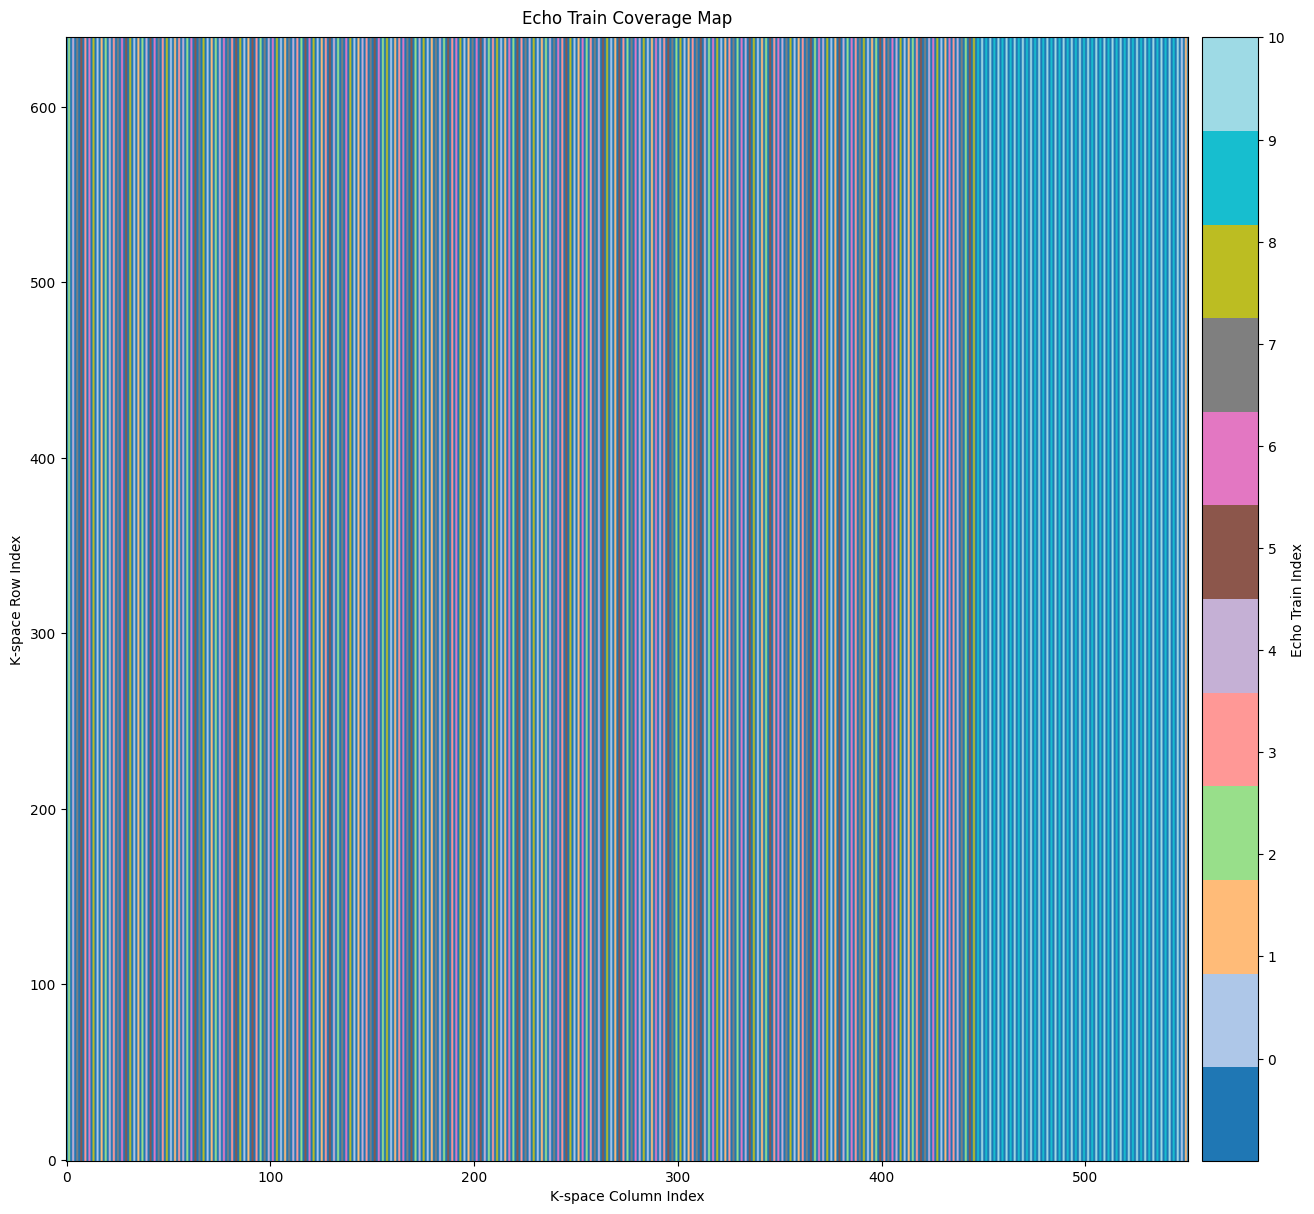

In [ ]:

# Build an echo-train index map
et_map = np.zeros((rows, cols), dtype=int)
for et_key, col_list in pat4.items():
    et_idx = int(et_key)
    et_map[:, col_list] = et_idx + 1  # +1 to distinguish from background 0

# Plot
fig_scaling = 45
plt.figure(figsize=(rows/fig_scaling, cols/fig_scaling))
cmap = plt.get_cmap('tab20', len(pat4) + 1)
plt.imshow(et_map, aspect='auto', cmap=cmap, origin='lower')
cbar = plt.colorbar(ticks=range(len(pat4) + 1), pad=0.01)
cbar.set_label('Echo Train Index')
cbar.set_ticks(list(range(1, len(pat4) + 1)))
cbar.set_ticklabels(list(pat4.keys()))
plt.xlabel('K‑space Column Index')
plt.ylabel('K‑space Row Index')
plt.title('Echo Train Coverage Map', color='black', pad=10)
plt.tight_layout()
plt.show()


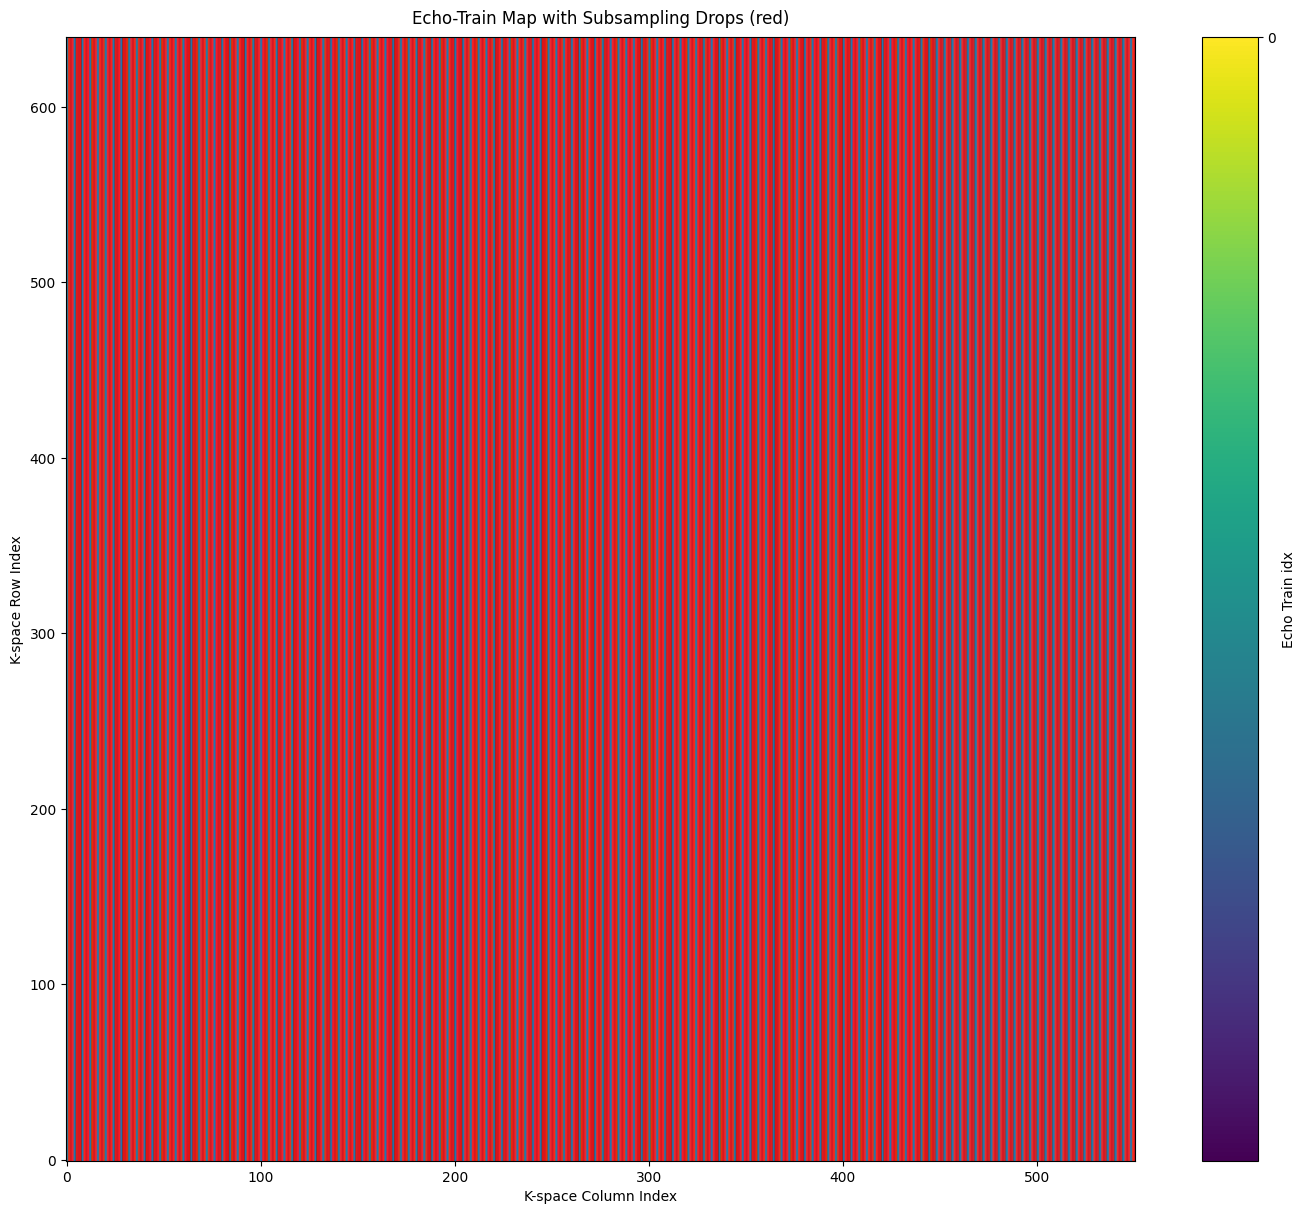

In [21]:
# Build echo-train index map
et_map = np.zeros((rows, cols), dtype=int)
for et_key, col_list in pat4.items():
    idx = int(et_key) + 1  # so background = 0
    et_map[:, col_list] = idx

# 2) Build Cartesian mask: keep every 4th column
def build_cartesian_mask(kspace_shape: tuple, acceleration: int) -> np.ndarray:
    n_rows, n_cols = kspace_shape[-2], kspace_shape[-1]
    m = np.zeros((n_rows, n_cols), dtype=bool)
    m[:, ::acceleration] = True
    return m

mask = build_cartesian_mask((rows, cols), acceleration=4)

# 3) Overlay dropped columns in red
dropped = ~mask  # True where dropped

fig_scaling = 45
plt.figure(figsize=(rows/fig_scaling, cols/fig_scaling))
cmap_et = plt.get_cmap('tab20', len(pat4) + 1)

# show echo-trains
plt.imshow(et_map, aspect='auto', origin='lower', cmap=cmap_et)

# build an RGBA overlay for dropped lines
overlay = np.zeros((rows, cols, 4), dtype=float)
overlay[..., 0] = dropped  # red channel
overlay[..., 3] = dropped * 0.8  # alpha

plt.imshow(overlay, aspect='auto', origin='lower')

plt.xlabel('K-space Column Index')
plt.ylabel('K-space Row Index')
plt.title('Echo-Train Map with Subsampling Drops (red)', color='black', pad=10)
plt.colorbar(ticks=range(1, len(pat4)+1), label='Echo Train idx')\
         .set_ticklabels(list(pat4.keys()))
plt.tight_layout()
plt.show()


New echo-train → kept columns mapping after R=4 subsampling:
  ET 0: [429, 393, 357, 321, 285, 249, 213, 177, 141, 105, 69, 33]  (len=12)
  ET 1: [413, 377, 341, 305, 269, 233, 197, 161, 125, 89, 53, 17, 549]  (len=13)
  ET 2: [441, 397, 329, 185, 133, 73, 37, 1]  (len=8)
  ET 3: [417, 401, 361, 325, 293, 273, 257, 209, 189, 113, 93, 81, 9]  (len=13)
  ET 4: [437, 381, 333, 313, 281, 261, 237, 205, 173, 145, 57, 21]  (len=12)
  ET 5: [365, 345, 245, 221, 169, 129, 117, 41, 29]  (len=9)
  ET 6: [433, 425, 405, 385, 369, 349, 317, 289, 253, 241, 217, 201, 165, 153, 137, 101, 77, 61]  (len=18)
  ET 7: [421, 389, 353, 309, 297, 277, 225, 181, 149, 109, 97, 65, 45, 25, 5]  (len=15)
  ET 8: [445, 409, 373, 337, 301, 265, 229, 193, 157, 121, 85, 49, 13]  (len=13)
  ET 9: []  (len=0)
  ET 10: [449, 453, 457, 461, 465, 469, 473, 477, 481, 485, 489, 493, 497, 501, 505, 509, 513, 517, 521, 525, 529, 533, 537, 541, 545]  (len=25)


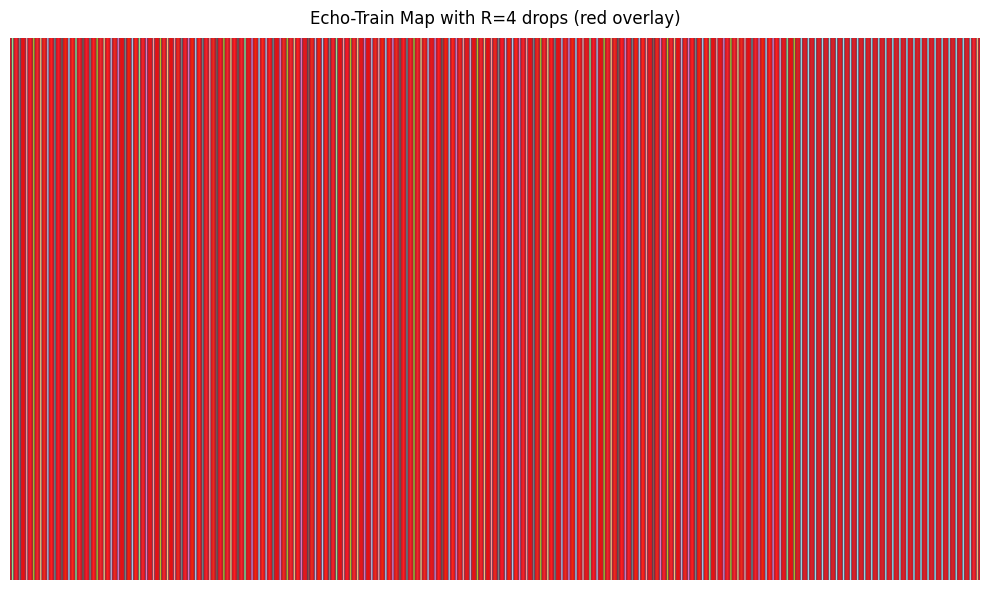

In [19]:

# 2) Build Cartesian mask (every 4th column), no offset
def build_cartesian_mask(n_rows, n_cols, acceleration, offset=0):
    m = np.zeros((n_rows, n_cols), dtype=bool)
    # start at `offset`, then step by `acceleration`
    m[:, offset::acceleration] = True
    return m

mask = build_cartesian_mask(rows, cols, acceleration=4, offset=1)

# 3) Compute new mapping: which cols each echo train *keeps*
new_mapping = {}
for et, col_list in pat4.items():
    kept = [c for c in col_list if mask[0, c]]
    new_mapping[et] = kept

print("New echo-train → kept columns mapping after R=4 subsampling:")
for et, kept in new_mapping.items():
    print(f"  ET {et}: {kept}  (len={len(kept)})")

# 4) Plot: echo-train map + red overlay for dropped lines
et_map = np.zeros((rows, cols), dtype=int)
for et, col_list in pat4.items():
    et_map[:, col_list] = int(et)+1

plt.figure(figsize=(10,6))
plt.imshow(et_map, aspect='auto', origin='lower', cmap='tab20')

dropped = ~mask
overlay = np.zeros((rows, cols, 4), float)
overlay[...,0] = dropped    # red
overlay[...,3] = dropped*0.8
plt.imshow(overlay, aspect='auto', origin='lower')

plt.title('Echo-Train Map with R=4 drops (red overlay)', color='black', pad=10)
plt.axis('off')
plt.tight_layout()
plt.show()
